# <b><span style='color:#F1A424'>AutoML - Binary Classification - Breast Cancer Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with customized train size i.e., 0.75.
- Outlier filteration and handling using method 'percentile' with customized upper and lower bound value. Use replacement value for features 'area_se' and 'radius_se' with 'delete' and 'median'.
- Feature scaling with method 'midrange'.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,1
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,1
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,1
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,2
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,2
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,1
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86517,M,18.66,17.12,121.4,1077.0,0.1054,0.11,0.1457,0.08665,0.1966,0.06213,0.7128,1.581,4.895,90.47,0.008102,0.02101,0.03342,0.01601,0.02045,0.00457,22.25,24.9,145.4,1549.0,0.1503,0.2291,0.3272,0.1674,0.2894,0.08456
86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.0142,0.01141,0.1614,0.0589,0.2185,0.8561,1.495,17.91,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.3,725.9,0.1157,0.135,0.08115,0.05104,0.2364,0.07182
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
87163,M,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,0.4697,1.147,3.142,43.4,0.006003,0.01063,0.02151,0.009443,0.0152,0.001868,17.98,29.87,116.6,993.6,0.1401,0.1546,0.2644,0.116,0.2884,0.07371
89869,B,14.76,14.74,94.87,668.7,0.08875,0.0778,0.04608,0.03528,0.1521,0.05912,0.3428,0.3981,2.537,29.06,0.004732,0.01506,0.01855,0.01067,0.02163,0.002783,17.27,17.93,114.2,880.8,0.122,0.2009,0.2151,0.1251,0.3109,0.08187
90251,B,12.39,17.48,80.64,462.9,0.1042,0.1297,0.05892,0.0288,0.1779,0.06588,0.2608,0.873,2.117,19.2,0.006715,0.03705,0.04757,0.01051,0.01838,0.006884,14.18,23.13,95.23,600.5,0.1427,0.3593,0.3206,0.09804,0.2819,0.1118
90745,B,10.8,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.621,2.24,20.2,0.006543,0.02148,0.02991,0.01045,0.01844,0.00269,12.76,32.04,83.69,489.5,0.1303,0.1696,0.1927,0.07485,0.2965,0.07662
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
845636,M,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
87880,M,13.81,23.75,91.56,597.8,0.1323,0.1768,0.1558,0.09176,0.2251,0.07421,0.5648,1.93,3.909,52.72,0.008824,0.03108,0.03112,0.01291,0.01998,0.004506,19.2,41.85,128.5,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.1086
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789


In [15]:
AutoClassifier.generate_custom_config("custom_breast_cancer")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  2

Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
-------------------------------------------------------------------------

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=200,
                     verbose=2,
                     custom_config_file='custom_breast_cancer.json')


Received below input for customization : 
{
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.75,
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "percentile",
    "OutlierLowerPercentile": 0.15,
    "OutlierUpperPercentile": 0.85,
    "OutlierFilterParam": {
        "area_se": {
            "replacement_value": "delete"
        },
        "radius_se": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "midrange"
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
area_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_se,FLOAT,455,0,None,10,445,0,0.0,100.0
symmetry_se,FLOAT,455,0,None,0,455,0,0.0,100.0
area_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
concave_points_mean,FLOAT,455,0,None,10,445,0,0.0,100.0
fractal_dimension_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
texture_se,FLOAT,455,0,None,0,455,0,0.0,100.0
compactness_se,FLOAT,455,0,None,0,455,0,0.0,100.0
id,BIGINT,455,0,None,0,455,0,0.0,100.0
symmetry_mean,FLOAT,455,0,None,0,455,0,0.0,100.0



Statistics of Data:


func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
50%,906564,13.28,18.9,86.34,546.4,0.095,0.092,0.062,0.034,0.179,0.062,0.325,1.083,2.287,24.6,0.006,0.02,0.026,0.011,0.019,0.003,14.97,25.5,97.9,686.6,0.131,0.214,0.228,0.1,0.282,0.08
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
mean,31292081.659,14.149,19.381,92.091,658.258,0.096,0.103,0.088,0.049,0.181,0.063,0.406,1.216,2.864,40.619,0.007,0.025,0.032,0.012,0.021,0.004,16.264,25.699,107.184,880.687,0.132,0.25,0.269,0.114,0.29,0.083
min,8670,6.981,9.71,43.79,143.5,0.053,0.019,0,0,0.106,0.05,0.112,0.36,0.757,6.802,0.002,0.002,0,0,0.008,0.001,7.93,12.02,50.41,185.2,0.071,0.027,0,0,0.157,0.055
max,911320502,28.11,39.28,188.5,2501,0.163,0.345,0.427,0.201,0.304,0.097,2.873,4.885,21.98,542.2,0.031,0.135,0.396,0.053,0.079,0.03,36.04,49.54,251.2,4254,0.218,0.938,1.252,0.273,0.664,0.173
75%,8910613.5,16.09,21.855,105.4,799.4,0.105,0.13,0.129,0.071,0.195,0.066,0.491,1.476,3.335,45.41,0.008,0.032,0.041,0.015,0.024,0.004,19.125,29.915,126.1,1098.5,0.146,0.326,0.379,0.161,0.315,0.092
25%,868452.5,11.68,16.12,75.015,418.5,0.086,0.066,0.03,0.02,0.162,0.058,0.232,0.832,1.597,17.855,0.005,0.013,0.015,0.008,0.015,0.002,13.04,21.07,83.945,514.6,0.117,0.148,0.114,0.065,0.251,0.071
std,127203536.959,3.564,4.366,24.509,357.276,0.014,0.05,0.077,0.038,0.027,0.007,0.283,0.561,2.061,47.632,0.003,0.018,0.031,0.006,0.008,0.003,4.845,6.106,33.509,570.924,0.022,0.148,0.2,0.064,0.062,0.017



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


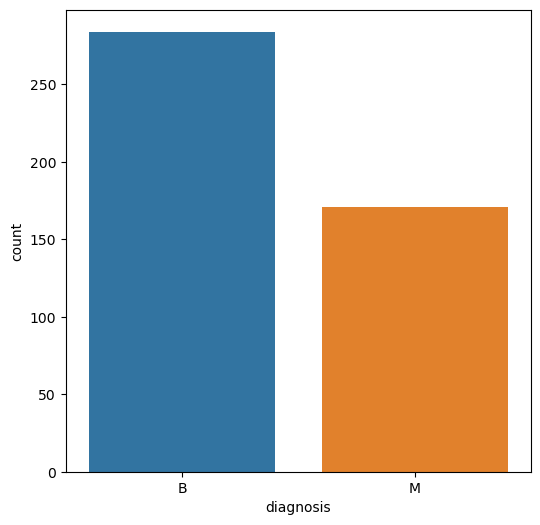

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0            texture_mean           1.098901
1  fractal_dimension_mean           2.857143
2        compactness_mean           1.978022
3               area_mean           3.956044
4           symmetry_mean           2.857143
5               radius_se           5.934066
6                 area_se          10.769231
7             symmetry_se           5.054945
8              texture_se           3.296703
9          symmetry_worst           4.395604


Analysis completed. No action taken.                                                    


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262894825755"'- 1/23


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 21% - 5/23


AutoML will proceed with default encoding technique.                                     


Analysis completed. No categorical columns were found.                                   


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.75                                                                      
Testing size  : 0.25                                                                      


symmetry_se,texture_worst,concavity_se,id,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst,diagnosis
0.01782,24.64,0.02701,13,14.97,0.03821,0.1925,0.3961,0.09965,0.01911,12.47,0.003586,96.05,1.044,0.006953,0.1015,0.2671,0.01037,0.08005,0.06373,0.1426,0.0875,2.497,481.9,677.9,0.1058,81.09,30.29,0.2378,18.6,0.3014,0
0.02018,27.65,0.04493,15,23.17,0.08481,0.2085,1.37,0.112,0.03889,15.5,0.005815,157.1,1.213,0.008198,0.2134,0.4211,0.02139,0.1522,0.06864,0.1517,0.1048,9.424,803.1,1748.0,0.1571,102.9,176.5,0.4002,21.08,0.3003,1
0.02277,14.1,0.0,43,10.62,0.0,0.1903,0.1988,0.0925,0.005656,9.738,0.00322,66.53,0.496,0.00604,0.0,0.0,0.0,0.0,0.06422,0.1234,0.08151,1.218,288.5,342.9,0.04102,61.24,12.26,0.07204,11.97,0.3105,0
0.01251,27.49,0.01167,30,13.29,0.01921,0.1602,0.1199,0.08477,0.01047,12.36,0.001356,85.56,0.8944,0.003457,0.08442,0.1937,0.005558,0.02643,0.06066,0.1184,0.07185,0.8484,466.7,544.1,0.06815,79.01,9.227,0.1963,18.54,0.2983,0
0.03356,25.47,0.05303,8,16.25,0.03562,0.1744,0.422,0.08138,0.04877,14.95,0.009368,107.1,1.909,0.00579,0.08405,0.25,0.01527,0.0905,0.06493,0.0997,0.09218,3.271,689.5,809.7,0.1167,97.84,39.43,0.2521,18.77,0.2852,0
0.0222,20.74,0.018,19,11.69,0.04268,0.1954,0.1779,0.1194,0.02348,11.06,0.008313,76.08,1.03,0.01262,0.09514,0.1256,0.01285,0.04063,0.07976,0.1662,0.1168,1.318,366.5,411.1,0.1071,71.25,12.3,0.2031,17.12,0.278,0
0.04022,25.21,0.05839,14,17.73,0.07981,0.1869,0.5706,0.1165,0.03756,16.26,0.006187,113.7,1.457,0.01056,0.1047,0.3344,0.01186,0.1799,0.06532,0.1426,0.07953,2.961,826.8,975.2,0.1283,107.5,57.72,0.2116,21.88,0.2736,1
0.01096,20.14,0.01376,32,13.8,0.01796,0.1601,0.2522,0.08872,0.01204,11.93,0.001857,87.64,1.045,0.006175,0.06876,0.1514,0.005832,0.02606,0.05541,0.1374,0.07262,1.649,442.7,589.5,0.05242,76.14,18.95,0.1575,10.91,0.246,0
0.02427,18.24,0.04436,23,16.34,0.07064,0.2116,0.5115,0.1132,0.04412,14.64,0.004841,109.4,0.7372,0.005508,0.1397,0.2604,0.01623,0.09966,0.06346,0.1277,0.08473,3.814,651.9,803.6,0.1339,95.77,42.76,0.3089,15.24,0.3151,0
0.01718,26.44,0.01056,33,12.41,0.0248,0.1714,0.1967,0.1077,0.009355,11.04,0.002198,79.93,1.387,0.005158,0.07431,0.1067,0.007483,0.03046,0.0634,0.1369,0.07881,1.342,373.2,471.4,0.07804,70.92,13.54,0.1482,16.83,0.2998,0


symmetry_se,texture_worst,concavity_se,id,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst,diagnosis
0.0214,24.7,0.0611,16,19.76,0.05778,0.177,0.6362,0.07371,0.05296,18.08,0.005036,129.1,1.305,0.00553,0.09181,0.2535,0.01444,0.1103,0.0534,0.08822,0.06558,4.312,1024.0,1228.0,0.08642,117.4,76.36,0.1963,21.84,0.2369,1
0.05333,33.17,0.09723,10,24.09,0.09961,0.231,0.9811,0.09081,0.1006,19.07,0.007646,177.4,1.666,0.006548,0.2493,0.7242,0.02638,0.2107,0.06343,0.1247,0.1038,8.83,1104.0,1651.0,0.219,128.3,104.9,0.7444,24.81,0.467,1
0.01934,19.14,0.01951,11,16.97,0.05397,0.199,0.1745,0.0988,0.01812,16.17,0.003696,113.1,0.489,0.00451,0.1251,0.2114,0.01196,0.06651,0.06572,0.1235,0.0896,1.349,788.5,861.5,0.1438,106.3,14.91,0.255,16.07,0.3153,0
0.01924,28.18,0.06329,26,28.19,0.1088,0.1721,1.167,0.09401,0.0496,21.75,0.004614,195.9,1.352,0.005687,0.1841,0.5807,0.01561,0.2195,0.06194,0.1272,0.08858,8.867,1491.0,2384.0,0.1961,147.3,156.8,0.4725,20.99,0.2833,1
0.02294,25.05,0.01946,12,19.8,0.0539,0.2026,0.5858,0.08772,0.01503,17.01,0.002581,130.0,0.8554,0.005038,0.1096,0.1932,0.01123,0.0695,0.05223,0.1111,0.06469,4.106,904.3,1210.0,0.07304,109.7,68.46,0.1486,20.26,0.3275,1
0.01144,29.33,0.02048,18,21.58,0.06527,0.1867,0.4203,0.09726,0.01206,17.19,0.001575,140.5,0.7383,0.004493,0.1984,0.3889,0.009875,0.09061,0.0558,0.1558,0.0757,2.819,928.3,1436.0,0.08995,111.6,45.42,0.2567,22.07,0.3216,1
0.01921,19.29,0.04344,21,13.13,0.02534,0.1646,0.2666,0.08108,0.03026,12.21,0.004622,87.65,0.8309,0.004405,0.0914,0.3076,0.01087,0.06839,0.06154,0.1026,0.08824,2.097,462.0,529.9,0.07823,78.78,19.96,0.2431,14.09,0.2677,0
0.01523,20.24,0.02039,37,17.77,0.04079,0.1594,0.2711,0.08876,0.01919,15.12,0.002881,117.7,0.3621,0.005472,0.1252,0.3327,0.00826,0.0755,0.05986,0.1491,0.0974,1.974,716.6,989.5,0.09588,98.78,26.44,0.3331,16.68,0.3415,1
0.03491,23.4,0.1027,24,10.06,0.04908,0.233,0.4653,0.09968,0.0659,9.042,0.007877,68.62,1.911,0.009845,0.1145,0.4609,0.02527,0.1975,0.08743,0.1221,0.1055,3.769,244.5,297.1,0.1972,60.07,24.2,0.3748,18.9,0.3135,0
0.02324,39.42,0.07117,29,25.74,0.152,0.2397,0.726,0.1178,0.06158,20.6,0.006185,184.6,1.595,0.006522,0.265,0.9387,0.01664,0.3514,0.07016,0.165,0.124,5.772,1265.0,1821.0,0.277,140.1,86.22,0.8681,29.33,0.4087,1


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
          ColumnName  OutlierPercentage
0      texture_worst           9.670330
1       radius_worst           9.670330
2          radius_se           9.670330
3        symmetry_se           9.670330
4                 id           9.670330
5  compactness_worst           9.670330
6      symmetry_mean           9.670330
7    perimeter_worst           9.450549
8       texture_mean           9.670330
9      smoothness_se           9.670330
result data stored in table '"ALICE"."ml__td_sqlmr_persist_

['symmetry_se', 'texture_worst', 'concavity_se', 'radius_worst', 'concave_points_mean', 'symmetry_mean', 'radius_se', 'smoothness_mean', 'compactness_se', 'radius_mean', 'fractal_dimension_se', 'perimeter_worst', 'texture_se', 'smoothness_se', 'concave_points_worst', 'concavity_worst', 'concave_points_se', 'concavity_mean', 'fractal_dimension_mean', 'smoothness_worst', 'fractal_dimension_worst', 'perimeter_se', 'area_mean', 'area_worst', 'compactness_mean', 'perimeter_mean', 'area_se', 'compactness_worst', 'texture_mean', 'symmetry_worst']


['symmetry_se', 'texture_worst', 'concavity_se', 'radius_worst', 'concave_points_mean', 'symmetry_mean', 'radius_se', 'smoothness_mean', 'compactness_se', 'radius_mean', 'fractal_dimension_se', 'perimeter_worst', 'texture_se', 'smoothness_se', 'concave_points_worst', 'concavity_worst', 'concave_points_se', 'concavity_mean', 'fractal_dimension_mean', 'smoothness_worst', 'fractal_dimension_worst', 'perimeter_se', 'area_mean', 'area_worst', 'compactness_mean', 'perimeter_mean', 'area_se', 'compactness_worst', 'texture_mean', 'symmetry_worst']


diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
0,13,-0.6452991452991452,-0.3272921108742005,-0.8636363636363636,-0.3490585557624664,-0.5283950617283951,-0.22527472527472517,-0.25113358911754446,-0.1498194945848376,-0.7168141592920353,-0.38726841464196404,-0.8131487889273357,-0.3591858761853366,-0.5851653370683881,-0.6971830985915493,-0.25722649103549206,-0.5733226837060703,-0.6060606060606061,-0.6105160662122688,-0.40174672489082913,-0.18068535825545168,-0.2426729191090272,-0.5042256181048458,-0.5889416732647138,-0.5830962650270717,-0.3137170056252705,-0.40223463687150823,-0.6202556931681982,-0.5651687905209032,-0.3987149137639499,-0.3234236394150084
1,17,-0.6495726495726495,0.31609808102345416,-0.8191919191919192,0.19925512104283036,0.08024691358024681,-0.22417582417582418,-0.10149982560167427,0.0036101083032492017,-0.4906588003933136,-0.024424642605294998,-0.8546712802768166,0.46187649371675304,-0.6046525790146764,-0.8239436619718309,0.4811562385656788,0.011980830670926439,-0.5909090909090909,-0.18062317429406033,-0.3275109170305674,0.15420560747663536,0.02227432590855785,-0.1891534599707276,-0.2583795196621801,-0.04065339084151597,0.2392903504976199,-0.018201477743737447,-0.35637235317618865,0.269170579029734,0.0524179912073046,0.16231119635578992
0,19,-0.45726495726495714,-0.5351812366737742,-0.9090909090909092,-0.6883923029174427,-0.4728395061728395,-0.19340659340659347,-0.4900592954307639,0.20577617328519873,-0.6302851524090461,-0.5680492339252514,-0.4878892733564015,-0.6671035386631718,-0.5936910054198893,-0.3028169014084506,-0.30406147091108665,-0.7993610223642171,-0.5113636363636364,-0.8023369036027264,0.3013100436681225,0.186915887850467,0.4443141852286047,-0.8753245935695064,-0.7412245975191344,-0.8279342938423419,-0.3024664647338815,-0.5795638853847539,-0.979624450659209,-0.6427453610552202,-0.49881636794048023,-0.43562694797410684
0,22,-0.7863247863247863,0.10980810234541591,-0.945959595959596,-0.5176908752327748,-0.7814814814814814,-0.42967032967032964,-0.9616323683292642,-0.503610108303249,-0.9724680432645033,-0.424450285274697,-0.9584775086505192,-0.5360419397116646,-0.2642348212654529,-0.8309859154929576,-0.45627515550676906,-0.8170926517571884,-0.7424242424242424,-0.8841285296981499,-0.7030567685589516,-0.6526479750778816,-0.6811254396248535,-0.9178168426685134,-0.6195566112430722,-0.702486923006332,-0.8797057550843792,-0.47197693278068115,-0.9320815021973632,-0.8987256874580818,-0.2688535678052081,-0.47686406137616894
0,25,-0.3205128205128205,-0.7675906183368872,-0.8242424242424242,-0.8342644320297953,-0.3518518518518519,0.2725274725274727,-0.21102197418904778,1.0,-0.1996066863323499,-0.7978075517661386,-0.3425605536332181,-0.775499190501889,-0.5553254978381342,-0.49999999999999994,-0.2499085254299305,-0.6646964856230032,-0.17045454545454547,-0.5262901655306719,0.9650655021834066,0.5607476635514018,0.64126611957796,-0.34149604192568594,-0.8966745843230405,-0.929705423511058,0.7083513630463001,-0.7554514326905748,-0.8250099880143827,-0.3275206796333556,-0.7862698681095707,-0.3119156077679213
0,32,-0.9358974358974358,-0.5671641791044777,-0.9303030303030303,-0.47010138630250364,-0.7777777777777778,-0.5813186813186814,-0.7530519707010813,-0.3483754512635379,-0.8564405113077678,-0.4565036220270529,-0.9307958477508651,-0.48885976408912196,-0.5845563607575667,-0.7535211267605633,-0.4965239663373582,-0.7581469648562301,-0.7803030303030303,-0.8729308666017526,-0.7641921397379912,-0.26168224299065435,-0.5920281359906214,-0.7711398939267561,-0.6406703615729745,-0.6642195099568688,-0.7758546083946344,-0.491

diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
1,300,-0.7478632478632478,0.04797441364605537,-0.8878787878787879,0.11649079246844585,-0.30740740740740746,0.032967032967032996,-0.12173003139169879,-0.1299638989169675,-0.7089478859390363,0.0858388358228093,-0.8961937716262978,0.15966386554621836,-0.4505815723768347,-0.8450704225352113,-0.03988291255031089,-0.5220447284345048,-0.6515151515151515,-0.49221032132424536,-0.6113537117903928,-0.22897196261682226,-0.5076201641266119,-0.3950048000503613,-0.1562417524412775,-0.12691566486188854,-0.1181306793595848,0.05027932960893866,-0.35277666799840196,-0.4138162307176392,-0.19986472776462644,-0.09997602493406874
1,460,-0.5085470085470084,0.06982942430703637,-0.7454545454545455,0.26236292158079844,0.48518518518518516,0.12967032967032974,0.4632019532612486,0.21119133574007226,-0.486725663716814,0.1961023142509136,-0.7923875432525953,0.2583455400508827,-0.369587723037574,-0.6056338028169014,0.3516282473472376,-0.10734824281150165,-0.5795454545454545,0.17672833495618306,-0.3973799126637554,0.14330218068535802,-0.3059788980070341,-0.03146000220330187,-0.03813671153338624,0.028172891621547257,0.06533967979229771,0.16921967922148134,0.1286456252497003,-0.301140174379611,-0.034832600608725096,-0.0760009590026374
0,449,-0.5384615384615384,-0.8059701492537314,-0.8999999999999999,-0.8394372025656942,-0.7432098765432099,-0.34615384615384615,-0.6655040111614929,-0.10108303249097464,-0.8112094395280235,-0.7675492018719148,-0.8546712802768166,-0.8359417161359959,-0.6260885451555936,-0.5140845070422535,-0.544090742773509,-0.8583067092651757,-0.4621212121212121,-0.8558909444985395,-0.16593886462882088,-0.3395638629283491,-0.4724501758499413,-0.6893029697360761,-0.8634204275534443,-0.9162154721482977,-0.6676763305928171,-0.7761758875473057,-0.9117059528565721,-0.8401520232506148,-0.8153533987149139,-0.5938623831215536
1,12,-0.4273504273504273,-0.3054371002132197,-0.9015151515151516,0.15063107800537962,-0.33456790123456787,-0.11428571428571421,0.41053365887687465,-0.36642599277978344,-0.7974434611602752,0.1948201807808196,-0.8823529411764707,0.16428956903862466,-0.7000182692893248,-0.8380281690140844,-0.19795096963044267,-0.6913738019169329,-0.5757575757575758,-0.6616358325219084,-0.9039301310043665,-0.6713395638629283,-0.7772567409144199,0.002219039675170223,-0.03153866455529176,-0.09479673304579238,-0.5975768065772394,0.11335375743377196,0.14222932481022751,-0.7645875251509054,-0.2864389584037876,-0.19827379525293692
1,96,-0.7435897435897435,-0.3315565031982944,-0.8232323232323232,0.1475274156838401,-0.18024691358024694,-0.3648351648351649,0.974189047785141,-0.2942238267148014,-0.6597836774827924,0.07429963459196118,-0.9307958477508651,0.1457867550690003,-0.6022166737713904,-0.42957746478873227,0.11233077204537141,-0.5480830670926518,-0.31439393939393934,-0.5243427458617332,-0.8296943231441044,-0.06542056074766368,-0.7960140679953107,0.29274012055208437,-0.14581683821588812,-0.08286684408552808,-0.500649069666811,0.012434672914038524,0.3577706751897722,-0.6396154706013861,-0.3276969901927631,-0.4979621193958283
0,223,-0.33333333333333326,-0.08635394456289985,-0.8722222222222222,-0.39250982826401826,-0.3703703703703704,-0.30769230769230765,-0.959190791768399,-0.14079422382671486,-0.4945919370698131,-0.305211872555933,-0.7716262975778547,-0.306298666255493,-0.6592777540953658,-0.8169014084507042,-0.1759970728137577,-0.49488817891373804,-0.6856060606060606,-0.5759493670886076,0.008733624454148723,-0.3006230529595017,0.22860492379835856,-0.8208715632426308,-0.5262602269728162,-0.61851885840139

['texture_worst', 'radius_worst', 'concave_points_mean', 'perimeter_worst', 'concave_points_worst', 'concavity_worst', 'concavity_mean', 'area_mean', 'area_worst', 'perimeter_mean', 'area_se', 'compactness_worst', 'texture_mean']


['r_texture_worst', 'r_radius_worst', 'r_concave_points_mean', 'r_perimeter_worst', 'r_concave_points_worst', 'r_concavity_worst', 'r_concavity_mean', 'r_area_mean', 'r_area_worst', 'r_perimeter_mean', 'r_area_se', 'r_compactness_worst', 'r_texture_mean']


diagnosis,id,r_texture_worst,r_radius_worst,r_concave_points_mean,r_perimeter_worst,r_concave_points_worst,r_concavity_worst,r_concavity_mean,r_area_mean,r_area_worst,r_perimeter_mean,r_area_se,r_compactness_worst,r_texture_mean
0,13,-0.3272921108742005,-0.3490585557624664,-0.5283950617283951,-0.3591858761853366,-0.25722649103549206,-0.5733226837060703,-0.6105160662122688,-0.5889416732647138,-0.5830962650270717,-0.40223463687150823,-0.6202556931681982,-0.5651687905209032,-0.3987149137639499
1,17,0.31609808102345416,0.19925512104283036,0.08024691358024681,0.46187649371675304,0.4811562385656788,0.011980830670926439,-0.18062317429406033,-0.2583795196621801,-0.04065339084151597,-0.018201477743737447,-0.35637235317618865,0.269170579029734,0.0524179912073046
0,19,-0.5351812366737742,-0.6883923029174427,-0.4728395061728395,-0.6671035386631718,-0.30406147091108665,-0.7993610223642171,-0.8023369036027264,-0.7412245975191344,-0.8279342938423419,-0.5795638853847539,-0.979624450659209,-0.6427453610552202,-0.49881636794048023
0,22,0.10980810234541591,-0.5176908752327748,-0.7814814814814814,-0.5360419397116646,-0.45627515550676906,-0.8170926517571884,-0.8841285296981499,-0.6195566112430722,-0.702486923006332,-0.47197693278068115,-0.9320815021973632,-0.8987256874580818,-0.2688535678052081
0,25,-0.7675906183368872,-0.8342644320297953,-0.3518518518518519,-0.775499190501889,-0.2499085254299305,-0.6646964856230032,-0.5262901655306719,-0.8966745843230405,-0.929705423511058,-0.7554514326905748,-0.8250099880143827,-0.3275206796333556,-0.7862698681095707
0,32,-0.5671641791044777,-0.47010138630250364,-0.7777777777777778,-0.48885976408912196,-0.4965239663373582,-0.7581469648562301,-0.8729308666017526,-0.6406703615729745,-0.6642195099568688,-0.4914398990809154,-0.8467838593687574,-0.7446903644086742,-0.9188366587757864
0,23,-0.668443496801706,-0.20732464307883317,-0.12839506172839513,-0.15334207077326334,0.022319795096963024,-0.5840255591054313,-0.51460564751704,-0.3646080760095013,-0.46774341561897764,-0.1376824653090647,-0.3711546144626449,-0.4062150681868991,-0.6259722691917484
1,14,-0.29690831556503205,-0.06352162218084013,-0.014814814814814895,-0.0870403207154421,-0.23380900109769479,-0.46581469648562307,-0.1241480038948393,-0.13380839271575626,-0.31026888134348896,0.07370697422959098,-0.07231322413104284,-0.6237424547283702,-0.17686844775109922
1,9,-0.2937100213219617,0.1630457272915374,-0.26666666666666666,0.14887055739727087,-0.11013538236370285,-0.5523961661341853,-0.5399221032132424,-0.15201900237529697,-0.07369000642378631,0.030455938006848038,0.2544946064722332,-0.596914822266935,-0.4359147784917146
0,8,-0.28304904051172725,-0.21663563004345138,-0.5604938271604939,-0.18880579754837726,-0.385290889132821,-0.6006389776357828,-0.5593962999026291,-0.31499076273423077,-0.4621455446453151,-0.10037844656694887,-0.43767479025169803,-0.5331991951710262,-0.38721677375718644


diagnosis,id,r_texture_worst,r_radius_worst,r_concave_points_mean,r_perimeter_worst,r_concave_points_worst,r_concavity_worst,r_concavity_mean,r_area_mean,r_area_worst,r_perimeter_mean,r_area_se,r_compactness_worst,r_texture_mean
1,300,0.04797441364605537,0.11649079246844585,-0.30740740740740746,0.15966386554621836,-0.03988291255031089,-0.5220447284345048,-0.49221032132424536,-0.1562417524412775,-0.12691566486188854,0.05027932960893866,-0.35277666799840196,-0.4138162307176392,-0.19986472776462644
1,460,0.06982942430703637,0.26236292158079844,0.48518518518518516,0.2583455400508827,0.3516282473472376,-0.10734824281150165,0.17672833495618306,-0.03813671153338624,0.028172891621547257,0.16921967922148134,0.1286456252497003,-0.301140174379611,-0.034832600608725096
0,449,-0.8059701492537314,-0.8394372025656942,-0.7432098765432099,-0.8359417161359959,-0.544090742773509,-0.8583067092651757,-0.8558909444985395,-0.8634204275534443,-0.9162154721482977,-0.7761758875473057,-0.9117059528565721,-0.8401520232506148,-0.8153533987149139
1,12,-0.3054371002132197,0.15063107800537962,-0.33456790123456787,0.16428956903862466,-0.19795096963044267,-0.6913738019169329,-0.6616358325219084,-0.03153866455529176,-0.09479673304579238,0.11335375743377196,0.14222932481022751,-0.7645875251509054,-0.2864389584037876
1,96,-0.3315565031982944,0.1475274156838401,-0.18024691358024694,0.1457867550690003,0.11233077204537141,-0.5480830670926518,-0.5243427458617332,-0.14581683821588812,-0.08286684408552808,0.012434672914038524,0.3577706751897722,-0.6396154706013861,-0.3276969901927631
0,223,-0.08635394456289985,-0.39250982826401826,-0.3703703703703704,-0.306298666255493,-0.1759970728137577,-0.49488817891373804,-0.5759493670886076,-0.5262602269728162,-0.6185188584013949,-0.29536853487114795,-0.9238913304035158,-0.11267605633802817,-0.13222861007778167
0,21,-0.6124733475479746,-0.5394165114835506,-0.6876543209876543,-0.4887055739727083,-0.3311379436516648,-0.5086261980830671,-0.6669912366114898,-0.6152019002375297,-0.7189134624208497,-0.44386375923589827,-0.8266080703156212,-0.5533199195171026,-0.70375380453162
0,284,-0.5479744136460556,-0.36974963790606263,-0.5703703703703704,-0.3342070773263434,-0.28869374313940727,-0.5193290734824281,-0.547711781888997,-0.5137239377144367,-0.5836468752867762,-0.32618489817985213,-0.7700759089093089,-0.5924435501900291,-0.619208657423064
0,182,0.04157782515991459,-0.8208152286364577,-0.8148148148148149,-0.8066455940174235,-0.5228686425173802,-0.8496805111821086,-0.894352482960078,-0.8693586698337293,-0.9017160686427456,-0.7803207785186519,-0.9416699960047942,-0.7247932036664431,-0.235711870138654
1,135,-0.3310234541577826,0.7610180012414647,0.06049382716049385,0.6746588543674351,0.46286132455177464,-0.3103833865814697,-0.3286270691333983,0.3177619424650303,0.60447829677893,0.41611101099297176,0.19296843787455045,-0.390118488710038,-0.3493405478525534


['symmetry_se', 'texture_worst', 'concavity_se', 'radius_worst', 'concave_points_mean', 'symmetry_mean', 'radius_se', 'smoothness_mean', 'compactness_se', 'radius_mean', 'fractal_dimension_se', 'perimeter_worst', 'texture_se', 'smoothness_se', 'concave_points_worst', 'concavity_worst', 'concave_points_se', 'concavity_mean', 'fractal_dimension_mean', 'smoothness_worst', 'fractal_dimension_worst', 'perimeter_se', 'area_mean', 'area_worst', 'compactness_mean', 'perimeter_mean', 'area_se', 'compactness_worst', 'texture_mean', 'symmetry_worst']


diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
0,258,-0.065017864401703,-0.2292110874200427,-0.9214141414141415,-0.5973515414856198,-0.8082716049382715,-0.45274725274725264,-0.9843041506801534,-0.13207547169811326,-0.9190878710438372,-0.47188922366818364,-0.9244641598607024,-0.6132911880348472,-0.04804823092381719,-0.6371429575238029,-0.6848884010245152,-0.8593769968051119,-0.7635915893161583,-0.8854430379746836,-0.6575671544005244,-0.289317969479913,-0.7526087466291479,-0.9719551155946555,-0.6588809712325153,-0.7559878865742864,-0.7479878840328863,-0.5071183997116597,-0.9362764682381143,-0.8731766205023306,-0.48055461616503214,-0.23423639415008393
0,117,-0.3076314156736057,-0.9749466950959489,-0.9413131313131313,-0.4411338713014692,-0.1906172839506174,0.3000000000000002,-0.20230205790024414,0.3806987451476031,-0.5335168075486534,-0.2513622668119751,-0.6359189088346255,-0.4315010407832858,-0.6034346263930335,-0.24582791694480552,-0.4579582875960483,-0.863594249201278,-0.6878575487781776,-0.6651898734177215,-0.2815025114653857,-0.14138897539707262,-0.6083948880290775,-0.4554382209911711,-0.48693586698337293,-0.6495365696980819,-0.3232366940718304,-0.27932960893854747,-0.573112265281662,-0.7884488559516226,-0.916807575245181,-0.4691920402781107
0,52,-0.5232879056930747,0.05063965884861404,-0.8066161616161617,-0.21973929236499093,-0.5197530864197532,-0.2835164835164834,-0.7460760376700385,-0.3546989257019048,-0.17692156477295054,-0.13084172062311666,-0.6395810013404641,-0.0901241230437129,-0.5638511661896354,-0.685837754277483,-0.1181851445298207,-0.35463258785942486,-0.5597651070278461,-0.508763388510224,-0.4125354880978383,-0.3142323263780754,0.10423261812639208,-0.46708424481830635,-0.35866983372921624,-0.46287969165825454,-0.1648636953699698,-0.1369616147053522,-0.7636835797043549,-0.15734996590769365,0.033479878254987994,-0.24046991129225617
1,212,-0.4698016730493571,-0.41311300639658854,-0.8664141414141414,0.487895716945996,-0.04617283950617293,-0.22197802197802194,0.43390303453086854,-0.5022117901959017,-0.8211126400629054,0.598692223860504,-0.9520334977820157,0.47575360419397106,-0.8029961634492419,-0.868671608755226,0.04281009879253563,-0.58370607028754,-0.5275620382648228,-0.437682570593963,-0.9563223411225159,-0.7595764559327315,-0.9033884394419043,-0.07269322169937534,0.4563209290050145,0.31540791043406446,-0.4881869320640417,0.4990088304198954,0.2698761486216538,-0.753126991046578,-0.3270206290158945,-0.3037640853512348
0,206,-0.738516505851394,-0.0810234541577825,-0.8512626262626263,-0.5383819573763708,-0.5697530864197531,-0.36153846153846136,-0.5653993721660273,0.11167283560530825,-0.6375073717318656,-0.4936854926597857,-0.7964982104113981,-0.5217022588852055,-0.21186285853480308,-0.587323894178407,-0.10867178924259048,-0.5410543130990415,-0.47035423375639324,-0.6557935735150925,-0.3343524787071417,0.22765493615696036,-0.1614491734083718,-0.6118726491556634,-0.6805225653206651,-0.7264384693034779,-0.34919948074426665,-0.5089205262209406,-0.8134238913304035,-0.5020734828923689,-0.4169766655393982,-0.4231599136897626
1,329,-0.3692475556791683,-0.5042643923240939,-0.7194949494949495,0.46306641837368084,0.24567901234567902,-0.2450549450549449,0.5608650156958493,0.03403448587162586,-0.3064674660900333,0.40509006987627405,-0.8175725163412242,0.4819212088505127,-0.8170026185981366,-0.7451428169904788,0.7402122210025615,0.17332268370607035,-0.35783292290206475,-0.03894839337877316,-0.5400742520200917,0.21364061040174373,-0.14081369445421527,0.061078673612313256,0.1950382686724729,0.23281637147838857,0.22977066

diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
1,12,-0.4265847970732335,-0.3054371002132197,-0.9017171717171717,0.15063107800537962,-0.33456790123456787,-0.11428571428571421,0.41053365887687465,-0.3664349553128103,-0.7961470414782779,0.1948201807808196,-0.8834901814463193,0.16428956903862466,-0.7000182692893248,-0.8333977444401502,-0.19795096963044267,-0.6913738019169329,-0.5745406326955862,-0.6616358325219084,-0.9008517143481111,-0.6708190594830272,-0.7776996130847699,0.002219039675170223,-0.03153866455529176,-0.09479673304579238,-0.5972306360882736,0.11335375743377196,0.14222932481022751,-0.7645283525032696,-0.2864389584037876,-0.19827379525293692
0,21,-0.5861877152820865,-0.6124733475479746,-0.7806060606060606,-0.5394165114835506,-0.6871604938271605,-0.5318681318681319,-0.7028252528775724,-0.48632301164575253,-0.4967564379791625,-0.42060388486441413,-0.7424650719290244,-0.4887055739727083,-0.7149381889044517,-0.8778765414748972,-0.3311379436516648,-0.5086261980830671,-0.5881795794658079,-0.6670399221032132,-0.49421271019873353,-0.803176580504516,-0.22546605698206149,-0.6301285783981997,-0.6152019002375297,-0.7189134624208497,-0.5523150151449591,-0.44386375923589827,-0.8266080703156212,-0.5532678313939842,-0.70375380453162,-0.4850155837928555
1,37,-0.756487880019683,-0.5618336886993606,-0.897020202020202,-0.059383405752121005,-0.4964197530864198,-0.5890109890109891,-0.6871294035577259,-0.34765730793536154,-0.7143699626498918,-0.047503045066991455,-0.8627613559415724,-0.025364274150026928,-1.0004262834175752,-0.8029020131398656,-0.08379070618368085,-0.46853035143769967,-0.6870619435499148,-0.6324245374878287,-0.567591177112907,-0.07910308315166617,-0.010669480595615217,-0.668843738688406,-0.27922934811295863,-0.2971460034871983,-0.3995672868887927,-0.08343845737970797,-0.6971634039153017,-0.35206733509942656,-0.528576259722692,-0.1311436106449292
1,10,0.8737724909608268,0.12739872068230282,-0.508939393939394,0.594454789985516,0.2297530864197531,0.197802197802198,1.7893268224625039,-0.31064367608558274,0.885983880479654,0.45893967562023225,-0.5335185108411757,0.8951507208387944,-0.20638207173740955,-0.7272950848469943,0.8243688254665203,0.15686900958466446,-0.0005682894487591459,0.025803310613437193,-0.41166193492028835,-0.4590470258486454,0.1394067299800678,1.48913300073968,0.23198733174980202,0.30990180783701937,0.6659454781479878,0.4485492881600291,0.8701558130243707,0.5674189329667013,0.02130537707135595,0.4706305442339967
1,26,-0.5849040456986373,-0.13859275053304912,-0.6803535353535353,1.0186219739292364,0.3432098765432098,-0.44945054945054935,2.4377397976979425,-0.2528662995395866,-0.116571653233733,0.8025514456054876,-0.7430178406091511,1.1804024362038397,-0.39760063333536333,-0.7877946808136879,0.34723746798390065,-0.07236421725239618,-0.4086001136578897,0.06864654333008764,-0.47674164664773966,-0.42011834319526636,-0.21749325829522817,1.5007790245668153,0.7426761678543151,0.9825640084426907,0.46776287321505833,0.7909533249234099,1.9069117059528566,-0.04043012194985641,-0.23706459249239112,-0.41021337808678976
1,31,-0.0402002524550182,0.013326226012793178,-0.6933333333333334,0.10717980550382762,0.08308641975308642,0.0494505494505495,-0.1287059644227415,-0.19129728265775925,-0.32160408885394126,0.11019937175459996,-0.7795696695825215,0.1534962608896772,-0.5985628159064613,-0.7914485472367634,0.6450786681302598,0.13210862619808306,-0.3726084485698049,-0.11830574488802331,-0.46625900851714364,-0.19744627841793871,-0.040215734552702734,-0.35471585275648804,-0.11586170493533923,-0.1360925025236303,0.0662051060

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
-------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263531397738"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262774529089"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719270203175117"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262267562276"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719270745284587"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263125282942"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262259946225"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262535918434"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264291953039"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262812222101"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262784935850"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262785855649"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265611454421"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263695742668"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262739079615"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_9,lasso,0.982456,0.982456,0.982456,0.982456,0.986301,0.976744,0.981151,0.982937,0.982456,0.982369
1,2,GLM_3,lasso,0.982456,0.982456,0.982456,0.982456,0.986301,0.976744,0.981151,0.982937,0.982456,0.982369
2,3,KNN_0,lasso,0.973684,0.973684,0.973684,0.973684,0.974206,0.969702,0.971863,0.973719,0.973684,0.973621
3,4,KNN_8,pca,0.973684,0.973684,0.973684,0.973684,0.974206,0.969702,0.971863,0.973719,0.973684,0.973621
4,5,KNN_4,rfe,0.973684,0.973684,0.973684,0.973684,0.979730,0.965116,0.971583,0.974751,0.973684,0.973481
5,6,SVM_3,lasso,0.964912,0.964912,0.964912,0.964912,0.962660,0.962660,0.962660,0.964912,0.964912,0.964912
6,7,DECISIONFOREST_2,pca,0.964912,0.964912,0.964912,0.964912,0.967257,0.958074,0.962302,0.965205,0.964912,0.964738
7,8,XGBOOST_2,pca,0.956140,0.956140,0.956140,0.956140,0.951623,0.955617,0.953534,0.956488,0.956140,0.956237
8,9,XGBOOST_0,lasso,0.947368,0.947368,0.947368,0.947368,0.939346,0.953161,0.944928,0.950577,0.947368,0.947775
9,10,XGBOOST_3,lasso,0.947368,0.947368,0.947368,0.947368,0.939346,0.953161,0.944928,0.950577,0.947368,0.947775


In [17]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_9,lasso,0.982456,0.982456,0.982456,0.982456,0.986301,0.976744,0.981151,0.982937,0.982456,0.982369
1,2,GLM_3,lasso,0.982456,0.982456,0.982456,0.982456,0.986301,0.976744,0.981151,0.982937,0.982456,0.982369
2,3,KNN_0,lasso,0.973684,0.973684,0.973684,0.973684,0.974206,0.969702,0.971863,0.973719,0.973684,0.973621
3,4,KNN_8,pca,0.973684,0.973684,0.973684,0.973684,0.974206,0.969702,0.971863,0.973719,0.973684,0.973621
4,5,KNN_4,rfe,0.973684,0.973684,0.973684,0.973684,0.979730,0.965116,0.971583,0.974751,0.973684,0.973481
5,6,SVM_3,lasso,0.964912,0.964912,0.964912,0.964912,0.962660,0.962660,0.962660,0.964912,0.964912,0.964912
6,7,DECISIONFOREST_2,pca,0.964912,0.964912,0.964912,0.964912,0.967257,0.958074,0.962302,0.965205,0.964912,0.964738
7,8,XGBOOST_2,pca,0.956140,0.956140,0.956140,0.956140,0.951623,0.955617,0.953534,0.956488,0.956140,0.956237
8,9,XGBOOST_0,lasso,0.947368,0.947368,0.947368,0.947368,0.939346,0.953161,0.944928,0.950577,0.947368,0.947775
9,10,XGBOOST_3,lasso,0.947368,0.947368,0.947368,0.947368,0.939346,0.953161,0.944928,0.950577,0.947368,0.947775


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_9,lasso,0.982456,0.982456,0.982456,0.982456,0.986301,0.976744,0.981151,0.982937,0.982456,0.982369


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,17.3,17.08,113.0,928.2,0.1008,0.1041,0.1266,0.08353,0.1813,0.05613,0.3093,0.8568,2.193,33.63,0.004757,0.01503,0.02332,0.01262,0.01394,0.002362,19.85,25.09,130.9,1222.0,0.1416,0.2405,0.3378,0.1857,0.3138,0.08113
B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,0.1872,0.9234,1.449,14.55,0.004477,0.01177,0.01079,0.007956,0.01325,0.002551,14.67,23.19,96.08,656.7,0.1089,0.1582,0.105,0.08586,0.2346,0.08025
B,13.37,16.39,86.1,553.5,0.07115,0.07325,0.08092,0.028,0.1422,0.05823,0.1639,1.14,1.223,14.66,0.005919,0.0327,0.04957,0.01038,0.01208,0.004076,14.26,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628
B,12.27,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.0231,0.02059,0.01075,0.02578,0.002267,14.1,28.88,89.0,610.2,0.124,0.1795,0.1377,0.09532,0.3455,0.06896
B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.01011,0.01055,0.01981,0.005742,0.0209,0.002788,9.507,15.4,59.9,274.9,0.1733,0.1239,0.1168,0.04419,0.322,0.09026
B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.0133,0.1466,0.06133,0.2889,0.9899,1.778,21.79,0.008534,0.006364,0.00618,0.007408,0.01065,0.003351,13.63,16.15,86.7,570.7,0.1162,0.05445,0.02758,0.0399,0.1783,0.07319
M,17.06,21.0,111.8,918.6,0.1119,0.1056,0.1508,0.09934,0.1727,0.06071,0.8161,2.129,6.076,87.17,0.006455,0.01797,0.04502,0.01744,0.01829,0.003733,20.99,33.15,143.2,1362.0,0.1449,0.2053,0.392,0.1827,0.2623,0.07599
B,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.268,2.68,26.43,0.01439,0.012,0.001597,0.002404,0.02538,0.00347,11.87,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
B,15.04,16.74,98.73,689.4,0.09883,0.1364,0.07721,0.06142,0.1668,0.06869,0.372,0.8423,2.304,34.84,0.004123,0.01819,0.01996,0.01004,0.01055,0.003237,16.76,20.43,109.7,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549
B,13.46,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0.1689,1.15,1.4,14.91,0.004942,0.01203,0.007508,0.005179,0.01442,0.001684,14.69,35.63,97.11,680.6,0.1108,0.1457,0.07934,0.05781,0.2694,0.07061


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266012767828"'⫾⫾⫾｜ 13% - 2/15


symmetry_se,texture_worst,concavity_se,id,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst,diagnosis
0.0135,23.0,0.007276,103,16.11,0.03781,0.178,0.2713,0.09855,0.0137,14.97,0.001706,104.6,1.217,0.00508,0.08485,0.06648,0.009073,0.02602,0.0565,0.1216,0.06428,1.893,685.9,793.7,0.07885,96.22,24.28,0.1637,16.95,0.2404,0
0.0146,33.88,0.01101,83,19.19,0.03323,0.1528,0.3795,0.08206,0.009269,16.02,0.003042,123.8,1.187,0.004029,0.09975,0.1459,0.007591,0.03299,0.05697,0.1181,0.08452,2.466,797.8,1150.0,0.06669,102.7,40.51,0.1551,23.24,0.2948,1
0.01637,18.2,0.001835,75,12.36,0.006588,0.1442,0.2818,0.07515,0.006134,10.9,0.002665,78.07,0.7614,0.006142,0.03953,0.01854,0.003576,0.00309,0.05743,0.1171,0.07685,1.808,366.8,470.0,0.03718,68.69,18.54,0.08294,12.96,0.2738,0
0.02912,28.26,0.03445,50,12.02,0.02257,0.203,0.28,0.09566,0.03051,11.13,0.004723,77.8,1.467,0.003495,0.06413,0.1564,0.01024,0.04824,0.06552,0.1087,0.08032,1.994,378.4,436.6,0.08194,71.49,17.85,0.1782,22.44,0.3169,0
0.01906,31.55,0.03312,89,16.76,0.03876,0.1944,0.3186,0.08515,0.02808,14.99,0.004015,110.2,1.336,0.004449,0.1308,0.3114,0.01196,0.06859,0.05913,0.1077,0.09251,2.31,693.7,867.1,0.1025,97.53,28.51,0.3345,22.11,0.3163,0
0.01393,19.71,0.00262,101,13.34,0.006423,0.1215,0.1716,0.08511,0.003012,12.49,0.001344,84.48,0.7151,0.004928,0.02784,0.01938,0.00339,0.004473,0.05673,0.1104,0.06174,1.047,481.6,544.2,0.03834,79.19,12.69,0.04953,16.85,0.1917,0
0.01715,15.38,0.04763,58,14.62,0.06615,0.1976,0.5461,0.1248,0.03247,13.94,0.005528,94.52,2.635,0.01004,0.1015,0.1559,0.02853,0.101,0.06457,0.1394,0.07253,4.091,594.2,653.3,0.09755,90.31,44.74,0.1364,13.17,0.216,0
0.03102,15.82,0.04505,9,12.12,0.01471,0.169,0.4222,0.07274,0.03387,11.14,0.004831,79.62,0.8092,0.005541,0.03922,0.1201,0.01471,0.04505,0.06083,0.08864,0.07018,3.33,384.6,453.5,0.06064,71.24,28.84,0.1256,14.07,0.2576,0
0.01995,27.96,0.0888,48,12.58,0.02854,0.2054,0.2428,0.09592,0.05914,11.3,0.008675,87.16,1.642,0.006663,0.1218,0.7436,0.01314,0.1548,0.07669,0.1347,0.1297,2.369,389.4,472.9,0.1325,73.93,16.39,0.4848,18.19,0.3308,0
0.01865,22.8,0.0,60,10.17,0.0,0.1985,0.5169,0.1039,0.01966,8.734,0.006736,64.01,2.079,0.01582,0.0,0.0,0.0,0.0,0.07098,0.146,0.08865,3.167,234.3,317.0,0.07428,55.27,28.85,0.131,16.84,0.2445,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263558200791"'⫾⫾⫾｜ 73% - 11/15


id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst,diagnosis
83,0.0146,33.88,0.011,19.19,0.0332,0.1528,0.3795,0.0821,0.0093,16.02,0.003,123.8,1.187,0.004,0.0998,0.1459,0.0076,0.033,0.057,0.1181,0.0845,2.466,797.8,1150.0,0.0667,102.7,40.51,0.1551,23.24,0.2948,1
91,0.0188,39.34,0.0376,15.65,0.0456,0.1943,0.4053,0.1034,0.0384,12.34,0.0057,101.7,1.809,0.0091,0.1459,0.4425,0.0132,0.1085,0.0694,0.1785,0.1205,2.642,477.4,768.9,0.1353,81.15,34.44,0.4706,26.86,0.3215,1
41,0.0117,28.03,0.0177,17.8,0.0326,0.1727,0.2054,0.0906,0.014,15.28,0.0026,113.8,0.4956,0.0033,0.1226,0.363,0.006,0.0537,0.0632,0.1301,0.0977,1.344,710.6,973.1,0.1052,98.92,19.53,0.3299,22.41,0.3175,1
80,0.0225,25.53,0.0383,23.57,0.1279,0.2069,0.7456,0.1096,0.0401,19.69,0.0046,152.5,0.7869,0.0062,0.243,0.4504,0.0206,0.1974,0.06,0.1444,0.0876,4.585,1203.0,1709.0,0.1599,130.0,94.03,0.4245,21.25,0.3613,1
81,0.0136,30.88,0.0339,27.32,0.095,0.1582,0.7582,0.0983,0.0189,19.81,0.002,186.8,1.017,0.0065,0.2388,0.5372,0.0152,0.1479,0.0539,0.1512,0.0761,5.865,1260.0,2398.0,0.1027,130.0,112.4,0.315,22.15,0.2768,1
46,0.0179,40.68,0.0774,15.09,0.0854,0.203,0.2976,0.1186,0.0722,12.46,0.0101,97.65,1.599,0.0071,0.221,1.105,0.0143,0.2273,0.0824,0.1853,0.2075,2.039,475.9,711.4,0.2396,83.97,23.94,1.058,24.04,0.4366,1
117,0.019,36.0,0.0133,13.87,0.015,0.1539,0.2409,0.0828,0.0123,12.77,0.0017,88.1,1.367,0.0088,0.065,0.0865,0.0093,0.02,0.0564,0.1234,0.0648,1.477,507.9,594.7,0.0423,81.35,18.76,0.1064,29.43,0.2407,0
77,0.015,28.36,0.014,14.44,0.0411,0.1979,0.3534,0.0959,0.0178,12.23,0.0033,92.15,1.326,0.0075,0.108,0.1377,0.0114,0.0419,0.0601,0.1429,0.0817,2.308,461.0,638.4,0.0809,78.54,27.24,0.2042,19.56,0.2668,0
71,0.0158,17.58,0.0148,15.61,0.0254,0.1659,0.2182,0.0847,0.012,14.81,0.0018,101.7,0.6232,0.0067,0.0795,0.1101,0.0106,0.0342,0.0535,0.1139,0.0614,1.677,680.7,760.2,0.0502,94.66,20.72,0.1011,14.7,0.2334,0
20,0.0144,35.63,0.0075,14.69,0.0112,0.1421,0.1689,0.0752,0.012,13.46,0.0017,97.11,1.15,0.0049,0.0578,0.0793,0.0052,0.0127,0.0576,0.1108,0.0706,1.4,562.1,680.6,0.0473,85.89,14.91,0.1457,28.21,0.2694,0


diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
1,83,-0.7820512820512819,0.16524520255863548,-0.9444444444444444,0.08752327746741155,-0.5901234567901235,-0.6615384615384616,-0.30903383327520056,-0.46750902527075805,-0.9095378564405113,0.0678889672414899,-0.8546712802768166,0.06869169686223112,-0.4980817246209123,-0.908450704225352,-0.2696670325649469,-0.7669329073482427,-0.7121212121212122,-0.8393378773125608,-0.6943231441048032,-0.5623052959501558,-0.31301289566236806,-0.5139830975275806,-0.17207706518870428,-0.14985775901624296,-0.6520986585893553,-0.012795098215894642,-0.4161006791849781,-0.7500558909009614,-0.08488332769699036,-0.3550707264444977
1,91,-0.6025641025641024,0.45628997867803855,-0.8101010101010101,-0.2787088764742397,-0.43703703703703706,-0.20549450549450543,-0.2190442971747472,-0.08303249097472913,-0.33726647000983284,-0.4039361497531892,-0.6678200692041523,-0.2720684604116876,-0.11929845928993374,-0.5492957746478873,0.06769118185144536,-0.29313099041533547,-0.5,-0.4717624148003895,-0.1528384279475978,0.378504672897196,0.5310668229777253,-0.45858579499850505,-0.5948799155449989,-0.49958704230522155,-0.05841627001298145,-0.4011533609659396,-0.5373551737914504,-0.04471272076905872,0.1599594183293878,-0.2270438743706545
1,41,-0.9059829059829058,-0.14658848614072495,-0.9106060606060606,-0.056279743430581466,-0.5975308641975309,-0.4428571428571429,-0.9162888036274853,-0.3140794223826715,-0.8171091445427728,-0.026988909545483643,-0.8823529411764707,-0.0854984195513068,-0.9191279459229037,-0.9577464788732393,-0.1028174167581412,-0.42012779552715657,-0.7727272727272728,-0.7385589094449854,-0.42358078602620036,-0.37538940809968857,-0.0035169988276673204,-0.8671409011504383,-0.287147004486672,-0.3121960172524547,-0.31890956295975775,-0.08091548026671463,-0.8351977626847783,-0.35926671137938737,-0.14102130537707142,-0.24622392711579957
1,80,-0.4444444444444444,-0.27985074626865675,-0.8065656565656566,0.5406579764121663,0.5790123456790125,-0.06703296703296698,0.9679107080572027,0.02888086642599286,-0.303834808259587,0.538431950766075,-0.7439446366782008,0.511217330969085,-0.7417331465805981,-0.7535211267605633,0.778265642151482,-0.2805111821086262,-0.2196969696969697,-0.03894839337877316,-0.5633187772925763,-0.15264797507788166,-0.24032825322391577,0.15298783462646154,0.3626286619160728,0.3631274662751216,0.15447858070099504,0.47918543881780506,0.6530163803435877,-0.14777554214173932,-0.21947920189381137,-0.03620234955646128
1,81,-0.8247863247863246,0.005330490405117158,-0.8287878787878789,0.9286157666045933,0.1728395061728395,-0.6021978021978021,1.0118590861527728,-0.17509025270758127,-0.7207472959685348,0.5538175524072055,-0.9238754325259516,1.04008943026752,-0.601607697460569,-0.7323943661971831,0.7475301866081231,-0.14185303514376996,-0.42424242424242425,-0.2799415774099318,-0.8296943231441044,-0.046728971962616855,-0.5099648300117233,0.5558773075651942,0.4378463974663499,0.9954115811691291,-0.34054521852012126,0.47918543881780506,1.0199760287654813,-0.3925776883523362,-0.15860669597565116,-0.4413809637976505
1,46,-0.641025641025641,0.5277185501066098,-0.6090909090909091,-0.3366439064763088,0.054320987654321,-0.10989010989010968,-0.5946982908964075,0.19133574007220217,0.3274336283185842,-0.38855054811205825,-0.3633217993079586,-0.3345154575591704,-0.24718348456245062,-0.6901408450704224,0.6172703988291256,0.7651757188498403,-0.4583333333333333,0.10662122687439145,0.4148471615720528,0.48442367601246084,2.570926143024618,-0.648384507640736,-0.5968593296384271,-0.5523538588602367,0.8442232799653829,-0.350333

id,texture_worst,radius_worst,concave_points_mean,perimeter_worst,concave_points_worst,concavity_worst,concavity_mean,area_mean,area_worst,perimeter_mean,area_se,compactness_worst,texture_mean,diagnosis
71,17.58,15.61,0.0254,101.7,0.0795,0.1101,0.0342,680.7,760.2,94.66,20.72,0.1011,14.7,0
18,16.15,13.63,0.0133,86.7,0.0399,0.0276,0.0092,508.8,570.7,81.29,21.79,0.0544,13.06,0
44,22.15,14.38,0.0507,95.29,0.1407,0.3582,0.0802,485.6,633.7,82.69,18.4,0.3842,18.17,0
43,22.47,12.84,0.0228,81.81,0.0632,0.0908,0.0304,409.0,506.2,73.34,23.47,0.0872,18.75,0
21,21.18,11.87,0.0024,75.39,0.0104,0.0069,0.0016,317.5,437.0,63.76,26.43,0.1019,15.11,0
96,20.35,12.68,0.0072,80.79,0.0556,0.2079,0.0271,378.2,496.7,70.31,12.98,0.1879,14.83,0
69,33.62,30.0,0.1845,211.7,0.2867,0.6476,0.3339,1878.0,2562.0,171.5,120.0,0.6076,24.91,1
78,34.12,18.98,0.053,126.7,0.1418,0.3403,0.0925,858.1,1124.0,108.3,48.55,0.3094,28.08,1
83,33.88,19.19,0.0332,123.8,0.0998,0.1459,0.033,797.8,1150.0,102.7,40.51,0.1551,23.24,1
79,34.66,22.75,0.1103,157.6,0.2255,0.4734,0.1863,1194.0,1540.0,129.9,67.66,0.3458,21.68,1


diagnosis,id,r_texture_worst,r_radius_worst,r_concave_points_mean,r_perimeter_worst,r_concave_points_worst,r_concavity_worst,r_concavity_mean,r_area_mean,r_area_worst,r_perimeter_mean,r_area_se,r_compactness_worst,r_texture_mean
1,83,0.16524520255863548,0.08752327746741155,-0.5901234567901235,0.06869169686223112,-0.2696670325649469,-0.7669329073482427,-0.8393378773125608,-0.17207706518870428,-0.14985775901624296,-0.012795098215894642,-0.4161006791849781,-0.7500558909009614,-0.08488332769699036
1,91,0.45628997867803855,-0.2787088764742397,-0.43703703703703706,-0.2720684604116876,0.06769118185144536,-0.29313099041533547,-0.4717624148003895,-0.5948799155449989,-0.49958704230522155,-0.4011533609659396,-0.5373551737914504,-0.04471272076905872,0.1599594183293878
1,41,-0.14658848614072495,-0.056279743430581466,-0.5975308641975309,-0.0854984195513068,-0.1028174167581412,-0.42012779552715657,-0.7385589094449854,-0.287147004486672,-0.3121960172524547,-0.08091548026671463,-0.8351977626847783,-0.35926671137938737,-0.14102130537707142
1,80,-0.27985074626865675,0.5406579764121663,0.5790123456790125,0.511217330969085,0.778265642151482,-0.2805111821086262,-0.03894839337877316,0.3626286619160728,0.3631274662751216,0.47918543881780506,0.6530163803435877,-0.14777554214173932,-0.21947920189381137
1,81,0.005330490405117158,0.9286157666045933,0.1728395061728395,1.04008943026752,0.7475301866081231,-0.14185303514376996,-0.2799415774099318,0.4378463974663499,0.9954115811691291,0.47918543881780506,1.0199760287654813,-0.3925776883523362,-0.15860669597565116
1,46,0.5277185501066098,-0.3366439064763088,0.054320987654321,-0.3345154575591704,0.6172703988291256,0.7651757188498403,0.10662122687439145,-0.5968593296384271,-0.5523538588602367,-0.35033339340421693,-0.7471034758290053,1.2684998882181984,-0.030774433547514496
0,117,0.2782515991471215,-0.46285950755224514,-0.8148148148148149,-0.4817670187340993,-0.5243322356384924,-0.8618210862619808,-0.9026290165530673,-0.5546318289786224,-0.659447554372763,-0.3975491079473779,-0.8505793048341989,-0.8589313659736195,0.33378424078457886
0,77,-0.12899786780383807,-0.40388992344299623,-0.49259259259259264,-0.41932002158661624,-0.20965971459934135,-0.7800319488817892,-0.7960077896786758,-0.6165215096331487,-0.6193447737909515,-0.44818886285817244,-0.6811825809029166,-0.6402861614129219,-0.33378424078457913
0,71,-0.7036247334754799,-0.282847092902959,-0.6864197530864198,-0.2720684604116876,-0.4182217343578485,-0.8241214057507987,-0.8334956183057448,-0.326603325415677,-0.5075708910709369,-0.15768606956208325,-0.8114262884538554,-0.87078023697742,-0.6624957727426447
0,20,0.25852878464818774,-0.3780260707635011,-0.8617283950617284,-0.34284172384550154,-0.5770215879985364,-0.8733226837060702,-0.9381694255111978,-0.4831089997360782,-0.5806185188584013,-0.3157325644260226,-0.9274870155813025,-0.771070869662419,0.2512681772066283


diagnosis,id,symmetry_se,texture_worst,concavity_se,radius_worst,concave_points_mean,symmetry_mean,radius_se,smoothness_mean,compactness_se,radius_mean,fractal_dimension_se,perimeter_worst,texture_se,smoothness_se,concave_points_worst,concavity_worst,concave_points_se,concavity_mean,fractal_dimension_mean,smoothness_worst,fractal_dimension_worst,perimeter_se,area_mean,area_worst,compactness_mean,perimeter_mean,area_se,compactness_worst,texture_mean,symmetry_worst
1,83,-0.7834449412721166,0.16524520255863548,-0.9444444444444444,0.08752327746741155,-0.5901234567901235,-0.6615384615384616,-0.30903383327520056,-0.46790647287171616,-0.9087871043837231,0.0678889672414899,-0.8545389218246895,0.06869169686223112,-0.4980817246209123,-0.9063345395776973,-0.2696670325649469,-0.7669329073482427,-0.7120666792953211,-0.8393378773125608,-0.6925092815025115,-0.5618187480535661,-0.31316684253722604,-0.5139830975275806,-0.17207706518870428,-0.14985775901624296,-0.6520986585893553,-0.012795098215894642,-0.4161006791849781,-0.7499972055486627,-0.08488332769699036,-0.3550707264444977
1,91,-0.6037311995892258,0.45628997867803855,-0.8101010101010101,-0.2787088764742397,-0.43703703703703706,-0.20549450549450543,-0.2190442971747472,-0.08332581023742881,-0.3367407116178494,-0.4039361497531892,-0.6679794922819673,-0.2720684604116876,-0.11929845928993374,-0.5479745634683624,0.06769118185144536,-0.29313099041533547,-0.49990528509187343,-0.4717624148003895,-0.15090631142170777,0.3786982248520707,0.5310118419509904,-0.45858579499850505,-0.5948799155449989,-0.49958704230522155,-0.05841627001298145,-0.4011533609659396,-0.5373551737914504,-0.04467768798274142,0.1599594183293878,-0.2270438743706545
1,41,-0.9075330010055411,-0.14658848614072495,-0.9106060606060606,-0.056279743430581466,-0.5975308641975309,-0.4428571428571429,-0.9162888036274853,-0.3144353164214138,-0.81639473166896,-0.026988909545483643,-0.8821773558310186,-0.0854984195513068,-0.9191279459229037,-0.955521202965253,-0.1028174167581412,-0.42012779552715657,-0.772684220496306,-0.7385589094449854,-0.42170779646210943,-0.3749610713173469,-0.0036346582248802024,-0.8671409011504383,-0.287147004486672,-0.3121960172524547,-0.31890956295975775,-0.08091548026671463,-0.8351977626847783,-0.359221130523233,-0.14102130537707142,-0.24622392711579957
1,80,-0.445411950963822,-0.27985074626865675,-0.8065656565656566,0.5406579764121663,0.5790123456790125,-0.06703296703296698,0.9679107080572027,0.028617856820438808,-0.30332219382740316,0.538431950766075,-0.7439851857993727,0.511217330969085,-0.7417331465805981,-0.7517478832168077,0.778265642151482,-0.2805111821086262,-0.21954915703731762,-0.03894839337877316,-0.5614763048700592,-0.15228900654001887,-0.24047367803962982,0.15298783462646154,0.3626286619160728,0.3631274662751216,0.15447858070099504,0.47918543881780506,0.6530163803435877,-0.14773705330695375,-0.21947920189381137,-0.03620234955646128
1,81,-0.8262339273870906,0.005330490405117158,-0.8287878787878789,0.9286157666045933,0.1728395061728395,-0.6021978021978021,1.0118590861527728,-0.1754085041076104,-0.7200707686259091,0.5538175524072055,-0.9236350068405125,1.04008943026752,-0.601607697460569,-0.730667884622141,0.7475301866081231,-0.14185303514376996,-0.4241333585906421,-0.2799415774099318,-0.8279100240227123,-0.04640298972282794,-0.51014186891781,0.5558773075651942,0.4378463974663499,0.9954115811691291,-0.34054521852012126,0.47918543881780506,1.0199760287654813,-0.3925309904653321,-0.15860669597565116,-0.4413809637976505
1,46,-0.6422412870927025,0.5277185501066098,-0.6090909090909091,-0.3366439064763088,0.054320987654321,-0.10989010989010968,-0.5946982908964075,0.19111672835605306,0.3276980538627876,-0.38855054811205825,-0.36395671821234615,-0.3345154575591704,-0.24718348456245062,-0.6885078874328074,0.6172703988291256,0.7651757188498403,-0.4582307255161962,0.10662122687439145,0.41690325398558625,0.4845842416692616,2.5711103294641804,-0.648384507640736,-0.5968593296384271,-0.5523538588602367,0.844223279965382

,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,diagnosis
0,69,5.636873,-0.370103,0.693829,-0.088766,0.287117,-0.919967,0.100953,0.009216,0.019534,0.414755,1
1,117,-1.114457,-0.630785,0.000623,0.951699,-0.059691,0.039447,-0.170777,-0.081215,0.191375,-0.099709,0
2,78,0.896308,-0.644551,0.143590,0.605798,0.357069,-0.217474,0.335478,-0.121802,-0.004063,0.012465,1
3,77,-0.527807,0.054538,0.000230,0.161189,-0.241674,-0.239568,-0.085256,0.007300,-0.210461,-0.039848,0
4,83,0.190575,-0.947730,-0.152251,0.452047,-0.157605,-0.129575,0.270887,0.178956,0.211132,0.075469,1
5,71,-0.815795,-0.885074,-0.483188,-0.426036,0.341090,0.141838,-0.214248,-0.047228,0.014525,-0.070242,0
6,79,2.588075,-0.406846,0.850138,0.164188,-0.420586,0.701968,-0.003607,-0.356287,-0.087057,0.087841,1
7,20,-1.083671,-0.784284,-0.403529,0.954618,0.069524,0.136864,0.079389,0.174272,0.187622,0.043766,0
8,91,0.472266,1.218290,0.030808,0.972001,-0.405572,-0.431855,0.230302,0.076760,0.186503,-0.117335,1
9,18,-1.364455,-0.655360,-0.153168,-0.449397,0.381137,-0.494541,-0.114073,0.117096,0.009487,0.021128,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : GLM_3 
Feature Selection Method : lasso

Target Column Mapping:
M: 1
B: 0

Prediction : 
    id  prediction      prob  diagnosis
0   83           1  0.974571          1
1   91           1  0.972931          1
2   41           0  0.866939          1
3   80           1  1.000000          1
4   81           1  1.000000          1
5   46           1  0.942099          1
6  117           0  0.994995          0
7   77           0  0.942279          0
8   71           0  0.999829          0
9   20           0  0.998508          0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       71        3   0.959459  0.972603  0.965986       73
1               1  CLAS

AUC,GINI
0.93701971266288,0.87403942532576


threshold_value,tpr,fpr
0.04081632653061224,0.926829268292683,0.0273972602739726
0.08163265306122448,0.926829268292683,0.0273972602739726
0.1020408163265306,0.926829268292683,0.0273972602739726
0.12244897959183673,0.926829268292683,0.0273972602739726
0.16326530612244897,0.926829268292683,0.0273972602739726
0.18367346938775508,0.926829268292683,0.0273972602739726
0.14285714285714285,0.926829268292683,0.0273972602739726
0.061224489795918366,0.926829268292683,0.0273972602739726
0.02040816326530612,0.926829268292683,0.0273972602739726
0.0,1.0,1.0



Confusion Matrix : 


array([[71,  2],
       [ 3, 38]], dtype=int64)

In [23]:
# Printing prediction
prediction.head()

id,prediction,prob,diagnosis
10,0,1.0,0
12,0,0.9360904603752123,0
13,1,1.0,1
14,0,0.9999593865804509,0
16,1,0.9703995524853217,1
17,1,1.0,1
15,1,0.9988176113275469,1
11,0,0.9948528711787665,0
9,0,0.9999985551688889,0
8,1,1.0,1


In [24]:
remove_context()

True